# Contents
- [Data](#data)
- [Linear Regression Model](#lin_reg)
    - [Single Feature Model](#sing)
    - [Two Feature Model](#two)
- [Modeling](#model)
    - [Train/Test Split](#tt_splt)
    - [Initial Model](#init_mod)
    - [Cross Validation](#crs_val)
- [Refined Modeling](#ref_mod)
    - [Pipeline](#pipe)
    - [Feature Selection](#feat_sel)
    - [Polynomial Transformation](#poly)
- [Regularization](#reg)
    - [Ridge](#ridge)
    - [Lasso](#lasso)
- [Feature Weights](#feat_wgt)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom Functions

## Feature Weight Sorting

In [2]:
def feat_sort(values, labels, ret_num='all'):
    '''
    Return dataframe of sorted (by absolute value) feature weights
    values : feature weight values from analysis
    labels : names of each feature
    ret_num : number of top features to return
    '''
    
    df = pd.DataFrame(values, index=labels, columns=['feat_wgt'])
    # drop weights = 0
    df = df[df['feat_wgt'] != 0]
    # note which weights are positive
    df['positive'] = df['feat_wgt'] > 0
    # take absolute value of weights
    df['feat_wgt'] = df['feat_wgt'].apply(abs)
    # sort weights (largest to smalles)
    df.sort_values(by='feat_wgt', ascending=False, inplace=True)
    if ret_num == 'all':
        return(df)
    else:
        return(df.iloc[:ret_num, :])

## Space Log
Return range of numbers between two values in a log scale

In [3]:
def space_log(start, stop, number):
    return(np.exp(np.linspace(np.log(start), np.log(stop), number)))

# Data <a name="data"></a>

## Load Data

In [4]:
column_names = ['cement', 'slag', 'fly_ash', 'water', 'superplasticizer', 
                'coarse_aggregate', 'fine_aggregate', 'age', 'strength']

In [5]:
df = pd.read_csv('data/Concrete_Data.csv', header=0, names=column_names)

In [6]:
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# define predictor variables (features)
X = df.iloc[:, :-1]
# define dependent variable (target)
y = df.iloc[:, -1]

## Single Feature

In [8]:
# create single feature dataframe
df_1 = df[['cement', 'strength']].copy()

In [9]:
df_1.head()

,cement,strength
0,540.0,79.99
1,540.0,61.89
2,332.5,40.27
3,332.5,41.05
4,198.6,44.30


### Define Variables

In [10]:
# define predictor variables (features)
X_1 = df_1.iloc[:, :-1]

### Plot

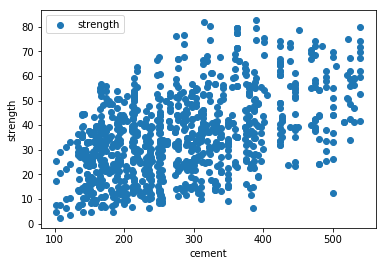

In [11]:
plt.scatter(X_1, y)
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

## Two Features

In [12]:
# create single feature dataframe
df_2 = df[['cement', 'age', 'strength']].copy()

In [13]:
df_2.head()

,cement,age,strength
0,540.0,28,79.99
1,540.0,28,61.89
2,332.5,270,40.27
3,332.5,365,41.05
4,198.6,360,44.30


### Define Variables

In [14]:
# define predictor variables (features)
X_2 = df_2.iloc[:, :-1]

### Plot

In [15]:
from mpl_toolkits import mplot3d

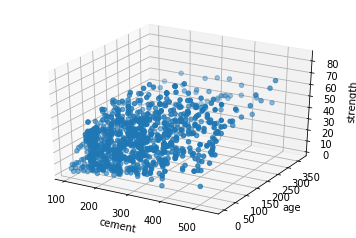

In [16]:
# uncomment for interactivity:
# %matplotlib notebook

ax = plt.axes(projection='3d')
ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], y)
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df_2.columns[-1]);

In [17]:
%matplotlib inline

# Linear Regression Model <a name="lin_reg"></a>
Model overview for simple cases

In [18]:
from sklearn.linear_model import LinearRegression

## Model: Single Feature <a name="sing"></a>

In [19]:
# create instance of linear regression model
lin_reg = LinearRegression()

In [20]:
# fit model on training data
lin_reg.fit(X_1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# output model coefficients
lin_reg.coef_

array([0.07958034])

In [22]:
# output model intercept
lin_reg.intercept_

13.44252811239992

In [23]:
# features
X_1.columns

Index(['cement'], dtype='object')

In [24]:
coefs = [lin_reg.intercept_, lin_reg.coef_[0]]

In [25]:
feats = ['intercept', X_1.columns[0]]

In [26]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,13.442528
cement,0.079580


### Model Equation

In [27]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(lin_reg.coef_[0], 4)}*{X_1.columns[0]} + {round(lin_reg.intercept_, 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = 0.0796*cement + 13.44
--------------------------------------------------------------------------------


### Model Visualization

In [28]:
# calculate model values with regression equation
x_mod = np.linspace(min(X_1.iloc[:, 0]), max(X_1.iloc[:, 0]))
y_mod = lin_reg.coef_[0]*x_mod + lin_reg.intercept_

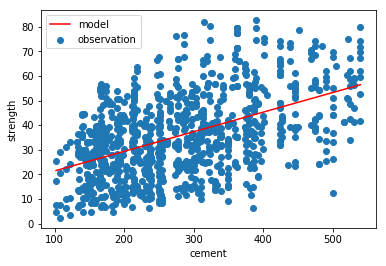

In [29]:
plt.scatter(X_1, y, label='observation')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

### Model Predictions

In [30]:
# predict target value based on feature input
predictions = lin_reg.predict(X_1)
predictions

array([56.41590947, 56.41590947, 39.90298978, ..., 25.26020799,
       26.10375955, 34.20503773])

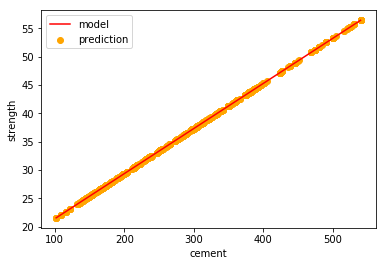

In [31]:
plt.scatter(X_1, predictions, c='orange', label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

### Model Evaluation

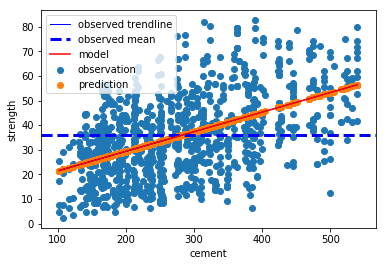

In [32]:
plt.scatter(X_1, y, label='observation')
z = np.polyfit(X_1.iloc[:, 0], y, 1)
p = np.poly1d(z)
plt.plot(X_1, p(X_1), 'b-', linewidth=1, label='observed trendline')
plt.axhline(y=np.mean(y), linewidth=3, linestyle='dashed', c='b', label='observed mean')
plt.scatter(X_1, predictions, label='prediction')
plt.plot(x_mod, y_mod, c='r', label='model')
plt.xlabel(X_1.columns[0])
plt.ylabel(df_1.columns[-1])
plt.legend();

#### Calculate R-squared Value
Proportion of target variation explained by the model

In [33]:
# sum of squared errors (observations - predictions)^2
SSE = sum((y - predictions)**2)
# sum squared errors from observed mean (observations - observed mean)^2
SST = sum((y - np.mean(y))**2)
# calculated r-squared score
R_sqr = 1 - SSE/SST
R_sqr

0.24783661989797445

In [34]:
# model r-squared score
lin_reg.score(X_1, y)

0.24783661989797431

#### Plot of Accuracy

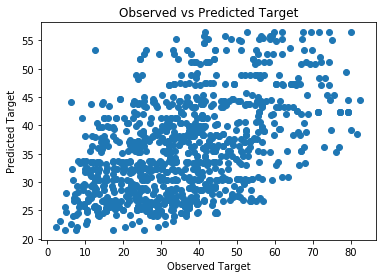

In [35]:
fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.set_xlabel('Observed Target')
ax.set_ylabel('Predicted Target')
ax.set_title('Observed vs Predicted Target');

#### Residual Plot
Determine if residuals are normally distributed as assumed by model

In [36]:
# calculate residual values (observations - predictions)
residuals = y - predictions

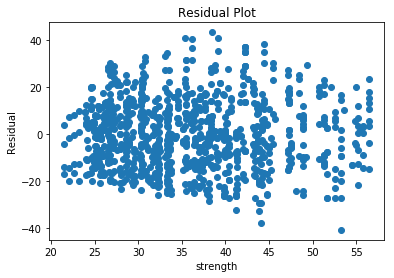

In [37]:
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)
ax.set_xlabel(df.columns[-1])
ax.set_ylabel('Residual')
ax.set_title('Residual Plot');

#### Q-Q Plot
Determine if residuals are normally distributed as assumed by model  
Points should mainly fall on the trendline

In [38]:
import scipy.stats as stats

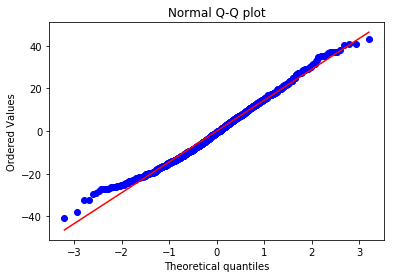

In [39]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

## Model: Two Features <a name="two"></a>

In [40]:
# create instance of linear regression model
lin_reg = LinearRegression()

In [41]:
# fit model on training data
lin_reg.fit(X_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
# output model coefficients
lin_reg.coef_

array([0.07578118, 0.07669928])

In [43]:
# output model intercept
lin_reg.intercept_

11.008474842316602

In [44]:
# features
X_2.columns

Index(['cement', 'age'], dtype='object')

In [45]:
coefs = [lin_reg.intercept_, lin_reg.coef_[0], lin_reg.coef_[1]]

In [46]:
feats = ['intercept', X_2.columns[0], X_2.columns[1]]

In [47]:
pd.DataFrame(coefs, index=feats, columns=['Model Coefficients'])

,Model Coefficients
intercept,11.008475
cement,0.075781
age,0.076699


### Model Equation

In [48]:
print('Regression Model Equation')
print('-'*80)
print(f'y = {round(lin_reg.coef_[0], 4)}*{X_2.columns[0]} \
{round(lin_reg.coef_[1], 4)}*{X_2.columns[1]} + {round(lin_reg.intercept_, 2)}')
print('-'*80)

Regression Model Equation
--------------------------------------------------------------------------------
y = 0.0758*cement 0.0767*age + 11.01
--------------------------------------------------------------------------------


### Model Vizualization

In [49]:
# calculate model values with regression equation
x1_lim = np.linspace(min(X_2.iloc[:, 0]), max(X_2.iloc[:, 0]), 10)
x2_lim = np.linspace(min(X_2.iloc[:, 1]), max(X_2.iloc[:, 1]), 10)
X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = lin_reg.coef_[0]*X1 + lin_reg.coef_[1]*X2 + lin_reg.intercept_

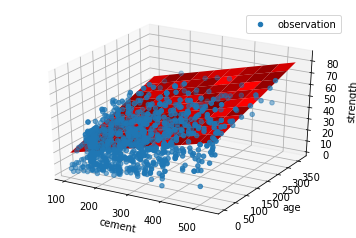

In [50]:
# uncomment for interactivity:
# %matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df.columns[-1])

ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], y, label='observation')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Predictions

In [51]:
# predict target value based on feature input
predictions = lin_reg.predict(X_2)
predictions

array([54.0778938 , 54.0778938 , 56.91452281, ..., 24.40956035,
       25.21284089, 32.9273654 ])

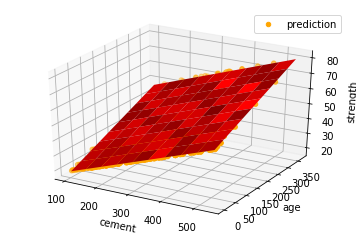

In [52]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df.columns[-1])

ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, c='orange', label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

### Model Evaluation

In [53]:
# calculate model values with regression equation
x1_lim = np.linspace(min(X_2.iloc[:, 0]), max(X_2.iloc[:, 0]), 10)
x2_lim = np.linspace(min(X_2.iloc[:, 1]), max(X_2.iloc[:, 1]), 10)
X1, X2 = np.meshgrid(x1_lim, x2_lim)
Y = lin_reg.coef_[0]*X1 + lin_reg.coef_[1]*X2 + lin_reg.intercept_

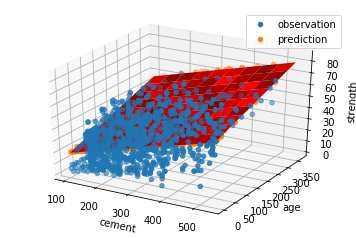

In [54]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel(X_2.columns[0])
ax.set_ylabel(X_2.columns[1])
ax.set_zlabel(df.columns[-1])

ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], y, label='observation')
ax.scatter3D(X_2.iloc[:, 0], X_2.iloc[:, 1], predictions, label='prediction')
ax.plot_surface(X1, X2, Y, color='red')
ax.legend();

In [55]:
%matplotlib inline

#### Calculate R-squared Value
Proportion of target variation explained by the model

In [56]:
# sum of squared errors (observations - predictions)^2
SSE = sum((y - predictions)**2)
# sum squared errors from observed mean (observations - observed mean)^2
SST = sum((y - np.mean(y))**2)
# calculated r-squared score
R_sqr = 1 - SSE/SST
R_sqr

0.33138640428653454

In [57]:
# model r-squared score
lin_reg.score(X_2, y)

0.33138640428653465

#### Plot of Accuracy

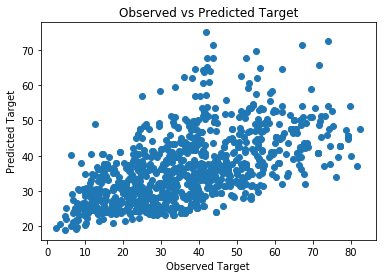

In [58]:
fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.set_xlabel('Observed Target')
ax.set_ylabel('Predicted Target')
ax.set_title('Observed vs Predicted Target');

#### Residual Plot
Determine if residuals are normally distributed as assumed by model

In [59]:
# calculate residual values (observations - predictions)
residuals = y - predictions

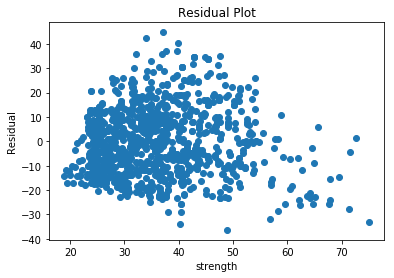

In [60]:
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)
ax.set_xlabel(df.columns[-1])
ax.set_ylabel('Residual')
ax.set_title('Residual Plot');

#### Q-Q Plot
Determine if residuals are normally distributed as assumed by model  
Points should mainly fall on the trendline

In [61]:
import scipy.stats as stats

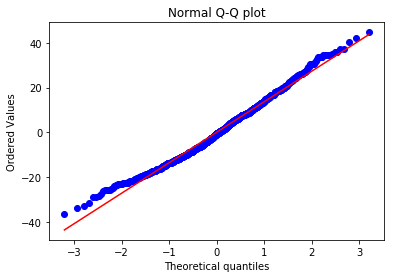

In [62]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

# Modeling <a name="model"></a>

## Train/Test Split <a name="tt_splt"></a>
Split data into feature training, feature test, target training and target test variables

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [65]:
X_train.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
193,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100
367,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,56
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91
711,305.3,203.5,0.0,203.5,0.0,965.4,631.0,90


In [66]:
y_train.head()

79     41.30
193    34.56
367    53.96
181    82.60
711    54.60
Name: strength, dtype: float64

In [67]:
X_test.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3


In [68]:
y_test.head()

747    26.06
718    10.35
175    79.30
828    74.99
713     9.69
Name: strength, dtype: float64

## Initial Model <a name="init_mod"></a>

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# create instance of linear regression model
lin_reg = LinearRegression()

In [71]:
# fit model on training data
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
# r-squared value for model using training data
lin_reg.score(X_train, y_train)

0.6108763464892633

## Cross Validation <a name="crs_val"></a>
Score model multiple times using different segments of training data

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
# output R-squared scores for cv number of model trials
cross_val_score(lin_reg, X_train, y_train, cv=10)

array([0.57604045, 0.64388889, 0.60160564, 0.51192297, 0.55155832,
       0.64162248, 0.53368539, 0.65742759, 0.56629761, 0.63710979])

In [75]:
# calculate average score for all cross validation trials
np.mean(cross_val_score(lin_reg, X_train, y_train, cv=10))

0.592115912676656

In [76]:
# r-squared value for model using training data
lin_reg.score(X_test, y_test)

0.6234704748356753

In [77]:
# output model predictions
predictions = lin_reg.predict(X_test)

### Plot of Accuracy

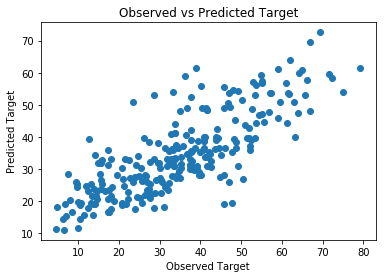

In [78]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.set_xlabel('Observed Target')
ax.set_ylabel('Predicted Target')
ax.set_title('Observed vs Predicted Target');

### Residual Plot
Determine if residuals are normally distributed as assumed by model

In [79]:
# calculate residual values (observations - predictions)
residuals = y_test - predictions

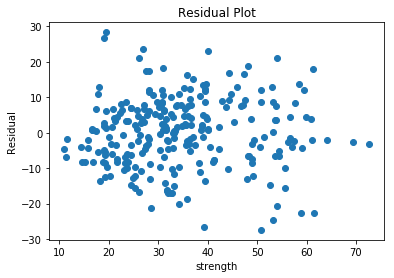

In [80]:
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)
ax.set_xlabel(df.columns[-1])
ax.set_ylabel('Residual')
ax.set_title('Residual Plot');

### Q-Q Plot
Determine if residuals are normally distributed as assumed by model  
Points should mainly fall on the trendline

In [81]:
import scipy.stats as stats

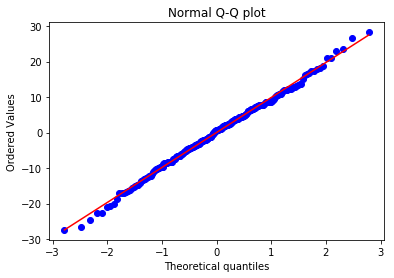

In [82]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

# Refined Modeling <a name="ref_mod"></a>

## Pipeline <a name="pipe"></a>

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [84]:
# set pipeline parameters
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # apply scaler to data
    ('model', LinearRegression()) # linear regression modeling
])

In [85]:
# fit model using pipeline parameters
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [86]:
# score pipelined model
lr_pipe.score(X_test, y_test)

0.6234704748356754

## Feature Selection <a name="feat_sel"></a>
Score features to determine if they have a significant impact on model predictions

In [87]:
from sklearn import feature_selection

In [88]:
# create instance of feature selector
feat_selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k='all')

In [89]:
# fit on training data
feat_selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x7f8372773378>)

In [90]:
# features
X.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

In [91]:
# output scores for each feature
feat_selector.scores_

array([240.07662729,  18.98625714,  10.38645361,  76.89361512,
       127.23204389,  18.98469779,  21.10204481,  88.49776334])

In [92]:
pd.DataFrame(feat_selector.scores_, index=X.columns, columns=['Feature Score'])

,Feature Score
cement,240.076627
slag,18.986257
fly_ash,10.386454
water,76.893615
superplasticizer,127.232044
coarse_aggregate,18.984698
fine_aggregate,21.102045
age,88.497763


### Find Optimal Number of Features

In [93]:
# initial number of features
k_0 = 1

In [94]:
# create instance of feature selector
feat_selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=k_0)

In [95]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('kbest', feat_selector),
    ('model', LinearRegression())
])

lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=1, score_func=<function f_regression at 0x7f8372773378>)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [96]:
from sklearn.model_selection import cross_validate

In [97]:
# score using initial k features
max_test_score = lr_pipe.score(X_test, y_test)
best_k = k_0

# input range for number of features
k_range = range(1, len(X.columns)+1)
train_scores = []
test_scores = []

# iterate through different number of features
for k in k_range:
    
    # input k value into feature selector within pipeline
    lr_pipe.set_params(kbest__k=k)
    # run cross validated model on pipeline
    cv_mod = cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True)
    # record score for cv training set
    train_scores.append(np.mean(cv_mod['train_score']))
    # record score for cv test set
    test_scores.append(np.mean(cv_mod['test_score']))
    
    # check if current cv test score > than current highest
    if np.mean(cv_mod['test_score']) > max_test_score:
        # update best test score
        max_test_score = np.mean(cv_mod['test_score'])
        # update best k value
        best_k = k

Optimal No. Features: 8


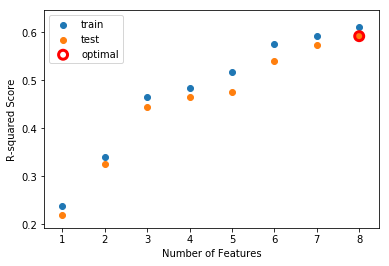

In [98]:
print('Optimal No. Features:', best_k)
plt.scatter(k_range, train_scores, label='train')
plt.scatter(k_range, test_scores, label='test')
plt.scatter(best_k, max_test_score, s=80, facecolors='none', edgecolors='r', linewidths=3, label='optimal')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Score')
plt.legend();

#### Output from Pipeline

In [99]:
lr_pipe.named_steps['kbest'].scores_

array([240.07662729,  18.98625714,  10.38645361,  76.89361512,
       127.23204389,  18.98469779,  21.10204481,  88.49776334])

## Polynomial Transformation <a name="poly"></a>
Transform feature data to polynomial features so that it is better able to fit the training data.

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
# create instance of polynomial features, specify degree
poly = PolynomialFeatures(degree=2)

In [102]:
# fit scaler to training feature data
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [103]:
# apply to training feature data, creates new features
poly.transform(X_train)[0:1]

array([[1.0000000e+00, 5.3130000e+02, 0.0000000e+00, 0.0000000e+00,
        1.4180000e+02, 2.8200000e+01, 8.5210000e+02, 8.9370000e+02,
        3.0000000e+00, 2.8227969e+05, 0.0000000e+00, 0.0000000e+00,
        7.5338340e+04, 1.4982660e+04, 4.5272073e+05, 4.7482281e+05,
        1.5939000e+03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0107240e+04, 3.9987600e+03,
        1.2082778e+05, 1.2672666e+05, 4.2540000e+02, 7.9524000e+02,
        2.4029220e+04, 2.5202340e+04, 8.4600000e+01, 7.2607441e+05,
        7.6152177e+05, 2.5563000e+03, 7.9869969e+05, 2.6811000e+03,
        9.0000000e+00]])

In [104]:
# output features
poly.get_feature_names()[:10]

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x0^2']

In [105]:
# output features mapped to dataframe columns
poly.get_feature_names(input_features=X_train.columns)[:10]

['1',
 'cement',
 'slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'cement^2']

In [106]:
# polynomial features dataframe
df_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names(input_features=X_train.columns))
df_poly.head()

,1,cement,slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,cement^2,...,superplasticizer^2,superplasticizer coarse_aggregate,superplasticizer fine_aggregate,superplasticizer age,coarse_aggregate^2,coarse_aggregate fine_aggregate,coarse_aggregate age,fine_aggregate^2,fine_aggregate age,age^2
0,1.0,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,282279.69,...,795.24,24029.22,25202.34,84.6,726074.41,761521.77,2556.3,798699.69,2681.1,9.0
1,1.0,233.8,0.0,94.6,197.9,4.6,947.0,852.2,100.0,54662.44,...,21.16,4356.20,3920.12,460.0,896809.00,807033.40,94700.0,726244.84,85220.0,10000.0
2,1.0,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,56.0,46182.01,...,92.16,9737.28,7493.76,537.6,1028804.49,791762.58,56800.8,609336.36,43713.6,3136.0
3,1.0,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91.0,152022.01,...,484.00,20783.40,16627.60,2002.0,892458.09,714004.26,85967.7,571233.64,68777.8,8281.0
4,1.0,305.3,203.5,0.0,203.5,0.0,965.4,631.0,90.0,93208.09,...,0.00,0.00,0.00,0.0,931997.16,609167.40,86886.0,398161.00,56790.0,8100.0


### Find Optimal Degree of Polynomial

In [107]:
# input initial degree
degree_0 = 2
# maximum degree
degree_max = 4

In [108]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=degree_0)),
    ('model', LinearRegression())
])

lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [109]:
from sklearn.model_selection import cross_validate

In [110]:
# score using initial degree value
max_test_score = lr_pipe.score(X_test, y_test)
best_degree = lr_pipe.named_steps['poly'].degree

# input range for degree values
deg_range = range(degree_0, degree_max+1)
train_scores = []
test_scores = []

# iterate through alpha values
for degree in deg_range:
    
    # input current degeree value into model within pipeline
    lr_pipe.set_params(poly__degree=degree)
    # run cross validated model on pipeline
    cv_mod = cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True)
    # record score for cv training set
    train_scores.append(np.mean(cv_mod['train_score']))
    # record score for dv test set
    test_scores.append(np.mean(cv_mod['test_score']))
    
    # check if current cv test score is > current highest
    if np.mean(cv_mod['test_score']) > max_test_score:
        # update best test score
        max_test_score = np.mean(cv_mod['test_score'])
        # update best degree value
        best_degree = degree

Optimal Polynomial Degree: 3


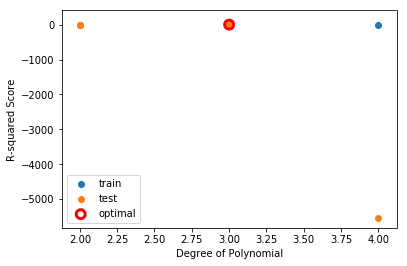

In [111]:
print('Optimal Polynomial Degree:', best_degree)
plt.scatter(deg_range, train_scores, label='train')
plt.scatter(deg_range, test_scores, label='test')
plt.scatter(best_degree, max_test_score, s=80, facecolors='none', edgecolors='r', linewidths=3, label='optimal')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared Score')
plt.legend();

# Regularization <a name="reg"></a>
Optimizes feature effects in model  
Introduces penalty for adding features  
Reduces overfitting

In [112]:
from sklearn import linear_model

## Overfit Model

In [113]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', LinearRegression())
])

lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [114]:
lr_pipe.score(X_train, y_train)

0.9848334166222925

In [115]:
np.mean(cross_val_score(lr_pipe, X_train, y_train))

-4939609.609667505

In [116]:
lr_pipe.score(X_test, y_test)

-53.195504733916785

## Ridge <a name="ridge"></a>
Adds the L2 norm (sum of squares) of the coefficients to the cost function

In [117]:
# create instance of regularization model
lr_ridge = linear_model.Ridge()

In [118]:
# fit instance with training data
lr_ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
lr_ridge.score(X_test, y_test)

0.6234708726184555

In [120]:
lr_ridge.alpha

1.0

### Optimize Alpha

In [121]:
# specify alpha value range
# higher alpha values penalize feature coefficients more
alpha_range = np.linspace(0.01, 10, 50)

In [122]:
lr_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Ridge())
])

lr_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [123]:
from sklearn.model_selection import cross_validate

In [124]:
# score using initial alpha value
max_test_score = lr_ridge.score(X_test, y_test)
best_alpha = lr_ridge.alpha

train_scores = []
test_scores = []
model_coefs = []

# iterate through alpha values
for alpha in alpha_range:
    
    # input current alpha value into model within pipeline
    lr_reg_pipe.set_params(model__alpha=alpha)
    # run cross validated model on pipeline
    cv_mod = cross_validate(lr_reg_pipe, X_train, y_train, cv=10, return_train_score=True)
    # record score for cv training set
    train_scores.append(np.mean(cv_mod['train_score']))
    # record score for dv test set
    test_scores.append(np.mean(cv_mod['test_score']))
    # fit model on training data
    lr_reg_pipe.fit(X_train, y_train)
    # record model coefficent
    model_coefs.append(lr_reg_pipe.named_steps['model'].coef_)
    
    # check if current cv test score is > current highest
    if np.mean(cv_mod['test_score']) > max_test_score:
        # update best test score
        max_test_score = np.mean(cv_mod['test_score'])
        # update best degree value
        best_alpha = alpha

Optimal Alpha Value: 2.4565306122448978


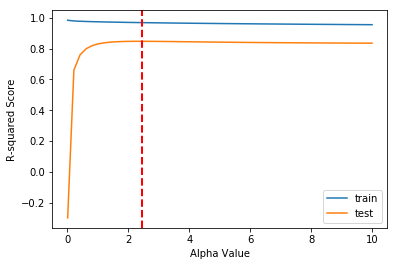

In [125]:
print('Optimal Alpha Value:', best_alpha)
plt.plot(alpha_range, train_scores, label='train')
plt.plot(alpha_range, test_scores, label='test')
plt.axvline(x=best_alpha, linewidth=2, linestyle='dashed', color='r')
plt.xlabel('Alpha Value')
plt.ylabel('R-squared Score')
plt.legend();

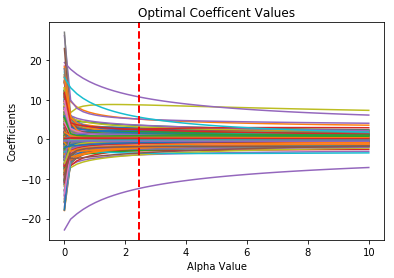

In [126]:
plt.plot(alpha_range, model_coefs)
plt.axvline(x=best_alpha, linewidth=2, linestyle='dashed', color='r')
plt.title('Optimal Coefficent Values')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficients');

### RidgeCV
Automatically optimizes

In [127]:
# specify alpha values
# higher alpha values penalize coefficients more
alpha_range = np.linspace(0.01, 10, 50)

In [128]:
lr_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.RidgeCV(alphas=alpha_range, cv=10))
])

lr_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', RidgeCV(alphas=array([ 0.01   ,  0.21388,  0.41776,  0.62163,  0.82551,  1.02939,
        1.23327,  1.43714,  1.64102,  1.8449 ,  ...v=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))])

In [129]:
# score on test data
lr_reg_pipe.score(X_test, y_test)

0.7286083910572032

In [130]:
# output best alpha value
lr_reg_pipe.named_steps['model'].alpha_

2.2526530612244895

## Lasso <a name="lasso"></a>
Adds the L1 norm (sum of absolute values) of the coefficients to the cost function

In [131]:
# create instance of regularization model
lr_lasso = linear_model.Lasso()

In [132]:
# fit instance with training data
lr_lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
lr_lasso.score(X_test, y_test)

0.6247261218497897

In [134]:
lr_lasso.alpha

1.0

### Optimize Alpha

In [135]:
# specify alpha value range
# higher alpha values penalize feature coefficients more
alpha_range = space_log(0.001, 1, 25)

In [136]:
lr_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.Lasso())
])

lr_reg_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [137]:
from sklearn.model_selection import cross_validate

In [138]:
# score using initial alpha value
max_test_score = lr_lasso.score(X_test, y_test)
best_alpha = lr_lasso.alpha

train_scores = []
test_scores = []
model_coefs = []

# iterate through alpha values
for alpha in alpha_range:
    
    # input current alpha value into model within pipeline
    lr_reg_pipe.set_params(model__alpha=alpha)
    # run cross validated model on pipeline
    cv_mod = cross_validate(lr_reg_pipe, X_train, y_train, cv=10, return_train_score=True)
    # record score for cv training set
    train_scores.append(np.mean(cv_mod['train_score']))
    # record score for dv test set
    test_scores.append(np.mean(cv_mod['test_score']))
    # fit model on training data
    lr_reg_pipe.fit(X_train, y_train)
    # record model coefficent
    model_coefs.append(lr_reg_pipe.named_steps['model'].coef_)
    
    # check if current cv test score is > current highest
    if np.mean(cv_mod['test_score']) > max_test_score:
        # update best test score
        max_test_score = np.mean(cv_mod['test_score'])
        # update best degree value
        best_alpha = alpha

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not co

Optimal Alpha Value: 0.04216965034285822


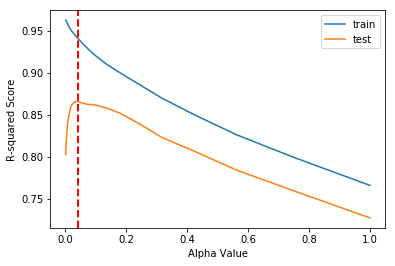

In [139]:
print('Optimal Alpha Value:', best_alpha)
plt.plot(alpha_range, train_scores, label='train')
plt.plot(alpha_range, test_scores, label='test')
plt.axvline(x=best_alpha, linewidth=2, linestyle='dashed', color='r')
plt.xlabel('Alpha Value')
plt.ylabel('R-squared Score')
plt.legend();

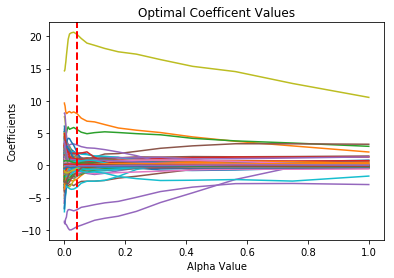

In [140]:
plt.plot(alpha_range, model_coefs)
plt.axvline(x=best_alpha, linewidth=2, linestyle='dashed', color='r')
plt.title('Optimal Coefficent Values')
plt.xlabel('Alpha Value')
plt.ylabel('Coefficients');

### LassoCV
Automatically optimizes

In [141]:
# specify alpha values
# higher alpha values penalize coefficients more
alpha_range = space_log(0.001, 1, 25)

In [142]:
lr_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', linear_model.LassoCV(alphas=alpha_range, cv=10))
])

lr_reg_pipe.fit(X_train, y_train)

/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/kevcon/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('model', LassoCV(alphas=array([0.001  , 0.00133, 0.00178, 0.00237, 0.00316, 0.00422, 0.00562,
       0.0075 , 0.01   , 0.01334, 0.01778, 0....alse,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [143]:
# score on test data
lr_reg_pipe.score(X_test, y_test)

0.8386868013525084

In [144]:
# output best alpha value
lr_reg_pipe.named_steps['model'].alpha_

0.04216965034285822

# Feature Weights <a name="feat_wgt"></a>

In [145]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [146]:
# feature coefficients
lr_pipe.named_steps['model'].coef_

array([12.79385256,  9.78354906,  6.17463919, -3.04035746,  1.89135449,
        1.92718884,  2.00939049,  7.13093662])

In [147]:
# feature names
X.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

In [148]:
# create feature dataframe
feat_sort(lr_pipe.named_steps['model'].coef_, X.columns)

,feat_wgt,positive
cement,12.793853,True
slag,9.783549,True
age,7.130937,True
fly_ash,6.174639,True
water,3.040357,False
fine_aggregate,2.009390,True
coarse_aggregate,1.927189,True
superplasticizer,1.891354,True


## Polynomial Model

In [149]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])

lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [150]:
lr_pipe.named_steps['model'].coef_

array([ 1.19584099e-11,  6.16503565e+00,  4.60350714e+00, -4.35111069e-01,
       -4.98904154e+00,  5.55610090e+00,  1.15191635e+00, -2.75773825e+00,
        2.28406054e+01, -1.07895185e+01, -2.24678010e+01, -1.75353124e+01,
       -1.00619579e+01,  4.27271919e+00, -1.22788376e+01, -1.88595426e+01,
       -3.50173103e+00, -1.12629123e+01, -1.81466050e+01, -1.12187884e+01,
        3.94787970e+00, -1.50229672e+01, -2.20112628e+01,  8.90739880e-02,
       -3.98942829e+00, -6.87222884e+00,  3.83414800e+00, -1.08895003e+01,
       -1.56297885e+01, -6.00003606e+00, -3.80016000e+00, -2.54950043e+00,
       -1.15327489e+01, -1.12466859e+01, -2.97789278e+00, -6.78005990e+00,
        6.40936440e-01,  2.12008323e+00,  6.12164121e+00, -4.40735438e+00,
       -1.32242028e+01, -3.84982605e+00, -1.09188967e+01, -1.92878745e+00,
       -1.73758512e+01, -1.94845165e+00, -1.08835903e+01, -2.00140738e+01,
        1.73477261e-01,  3.95912714e+00, -6.08814381e+00, -1.49947781e+01,
       -2.35048714e+00, -

In [151]:
lr_pipe.named_steps['poly'].get_feature_names(X.columns)

['1',
 'cement',
 'slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse_aggregate',
 'fine_aggregate',
 'age',
 'cement^2',
 'cement slag',
 'cement fly_ash',
 'cement water',
 'cement superplasticizer',
 'cement coarse_aggregate',
 'cement fine_aggregate',
 'cement age',
 'slag^2',
 'slag fly_ash',
 'slag water',
 'slag superplasticizer',
 'slag coarse_aggregate',
 'slag fine_aggregate',
 'slag age',
 'fly_ash^2',
 'fly_ash water',
 'fly_ash superplasticizer',
 'fly_ash coarse_aggregate',
 'fly_ash fine_aggregate',
 'fly_ash age',
 'water^2',
 'water superplasticizer',
 'water coarse_aggregate',
 'water fine_aggregate',
 'water age',
 'superplasticizer^2',
 'superplasticizer coarse_aggregate',
 'superplasticizer fine_aggregate',
 'superplasticizer age',
 'coarse_aggregate^2',
 'coarse_aggregate fine_aggregate',
 'coarse_aggregate age',
 'fine_aggregate^2',
 'fine_aggregate age',
 'age^2',
 'cement^3',
 'cement^2 slag',
 'cement^2 fly_ash',
 'cement^2 water',
 'cement^2 superplas

In [152]:
feat_sort(lr_pipe.named_steps['model'].coef_, lr_pipe.named_steps['poly'].get_feature_names(X.columns), 10)

,feat_wgt,positive
cement fly_ash fine_aggregate,51.519471,False
slag fly_ash fine_aggregate,43.397757,False
fly_ash coarse_aggregate fine_aggregate,38.397337,False
cement slag fine_aggregate,34.452843,False
cement slag fly_ash,33.016179,False
cement fly_ash coarse_aggregate,29.366155,False
fly_ash^2 fine_aggregate,28.317813,False
fly_ash fine_aggregate^2,25.386851,False
fly_ash water fine_aggregate,24.219500,False
age,22.840605,True
